# Scholastic Case Study

### Goal: Modeling
- Use binary classification to predict DC schools
    - Definition: Subscription rates dropped 50% or more between 2017 and 2019
- Examine metrics and feature importance

### Resources
Scholastic Red = #e40404

### Setup

In [110]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [111]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

In [112]:
# Plotting specs
matplotlib.rcParams['figure.figsize'] = 12, 8
plt.rcParams['figure.dpi'] = 300
sns.set()

In [113]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [114]:
selected_features = pd.read_csv('Data/selected_features.csv', index_col=0)

In [115]:
selected_features.head()

,enrollment,hhi,order_amount_delta,bookclub_rev_delta,revenue_ed_group_delta,teacher_count_delta,b_pct_wa,class
0,0.157210,0.159713,4.367848e-20,0.001022,0.001341,6.797284e-18,0.90,0.0
1,0.226636,0.131550,5.358635e-20,0.000856,0.001341,7.552538e-18,0.94,0.0
2,0.233979,0.127436,2.183572e-18,0.001405,0.001341,1.480297e-16,0.34,0.0
3,0.203939,0.103899,4.181908e-20,0.000615,0.001341,1.762259e-18,0.94,0.0
4,0.084446,0.080696,1.032413e-19,0.001466,0.001341,5.286776e-18,0.06,0.0


In [116]:
# No nulls
selected_features.isnull().sum().sum()

0

## Data Split

In [117]:
target = selected_features.pop('class')

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
									selected_features, target,
								test_size=0.2, random_state=0)

In [119]:
models = [LogisticRegression(), SVC(), LinearSVC(), GaussianNB(),
	RandomForestClassifier(), KNeighborsClassifier()]

In [120]:
acc, f1, precision, recall = [], [], [], []

In [121]:
for model in models:
	name = str(model)
	model = model.fit(X_train, y_train)
	preds = model.predict(X_test)
	
	acc_temp, f1_temp, precision_temp, recall_temp = \
	accuracy_score(preds, y_test), f1_score(preds, y_test), \
	precision_score(preds, y_test), recall_score(preds, y_test)
	
	acc.append(acc_temp)
	f1.append(f1_temp)
	precision.append(precision_temp)
	recall.append(recall_temp)
	
print('All models scored')

/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shifraisaacs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


All models scored


In [122]:
model_results = DataFrame({'model': models, 'accuracy': acc,
							'f1': f1, 'precision': precision, 'recall': recall})

In [123]:
model_results

,model,accuracy,f1,precision,recall
0,LogisticRegression(),0.865762,0.000000,0.000000,0.000000
1,SVC(),0.865762,0.000000,0.000000,0.000000
2,LinearSVC(),0.865762,0.000000,0.000000,0.000000
3,GaussianNB(),0.158872,0.238034,0.978723,0.135493
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.864691,0.020672,0.010638,0.363636
5,KNeighborsClassifier(),0.842199,0.039130,0.023936,0.107143


## Feature Importance in Logistic Regression Model

In [128]:
model = RandomForestClassifier()

In [129]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [133]:
importances = model.feature_importances_

In [134]:
feat_imp = DataFrame({'Feature': selected_features.columns, 'Importance': importances.flatten()})
feat_imp = feat_imp.sort_values(by='Importance (Abs)', ascending=False)
feat_imp

,Feature,Importance,Importance (Abs)
3,bookclub_rev_delta,0.274439,0.274439
1,hhi,0.271950,0.271950
0,enrollment,0.253439,0.253439
6,b_pct_wa,0.181155,0.181155
2,order_amount_delta,0.009318,0.009318
5,teacher_count_delta,0.005694,0.005694
4,revenue_ed_group_delta,0.004005,0.004005


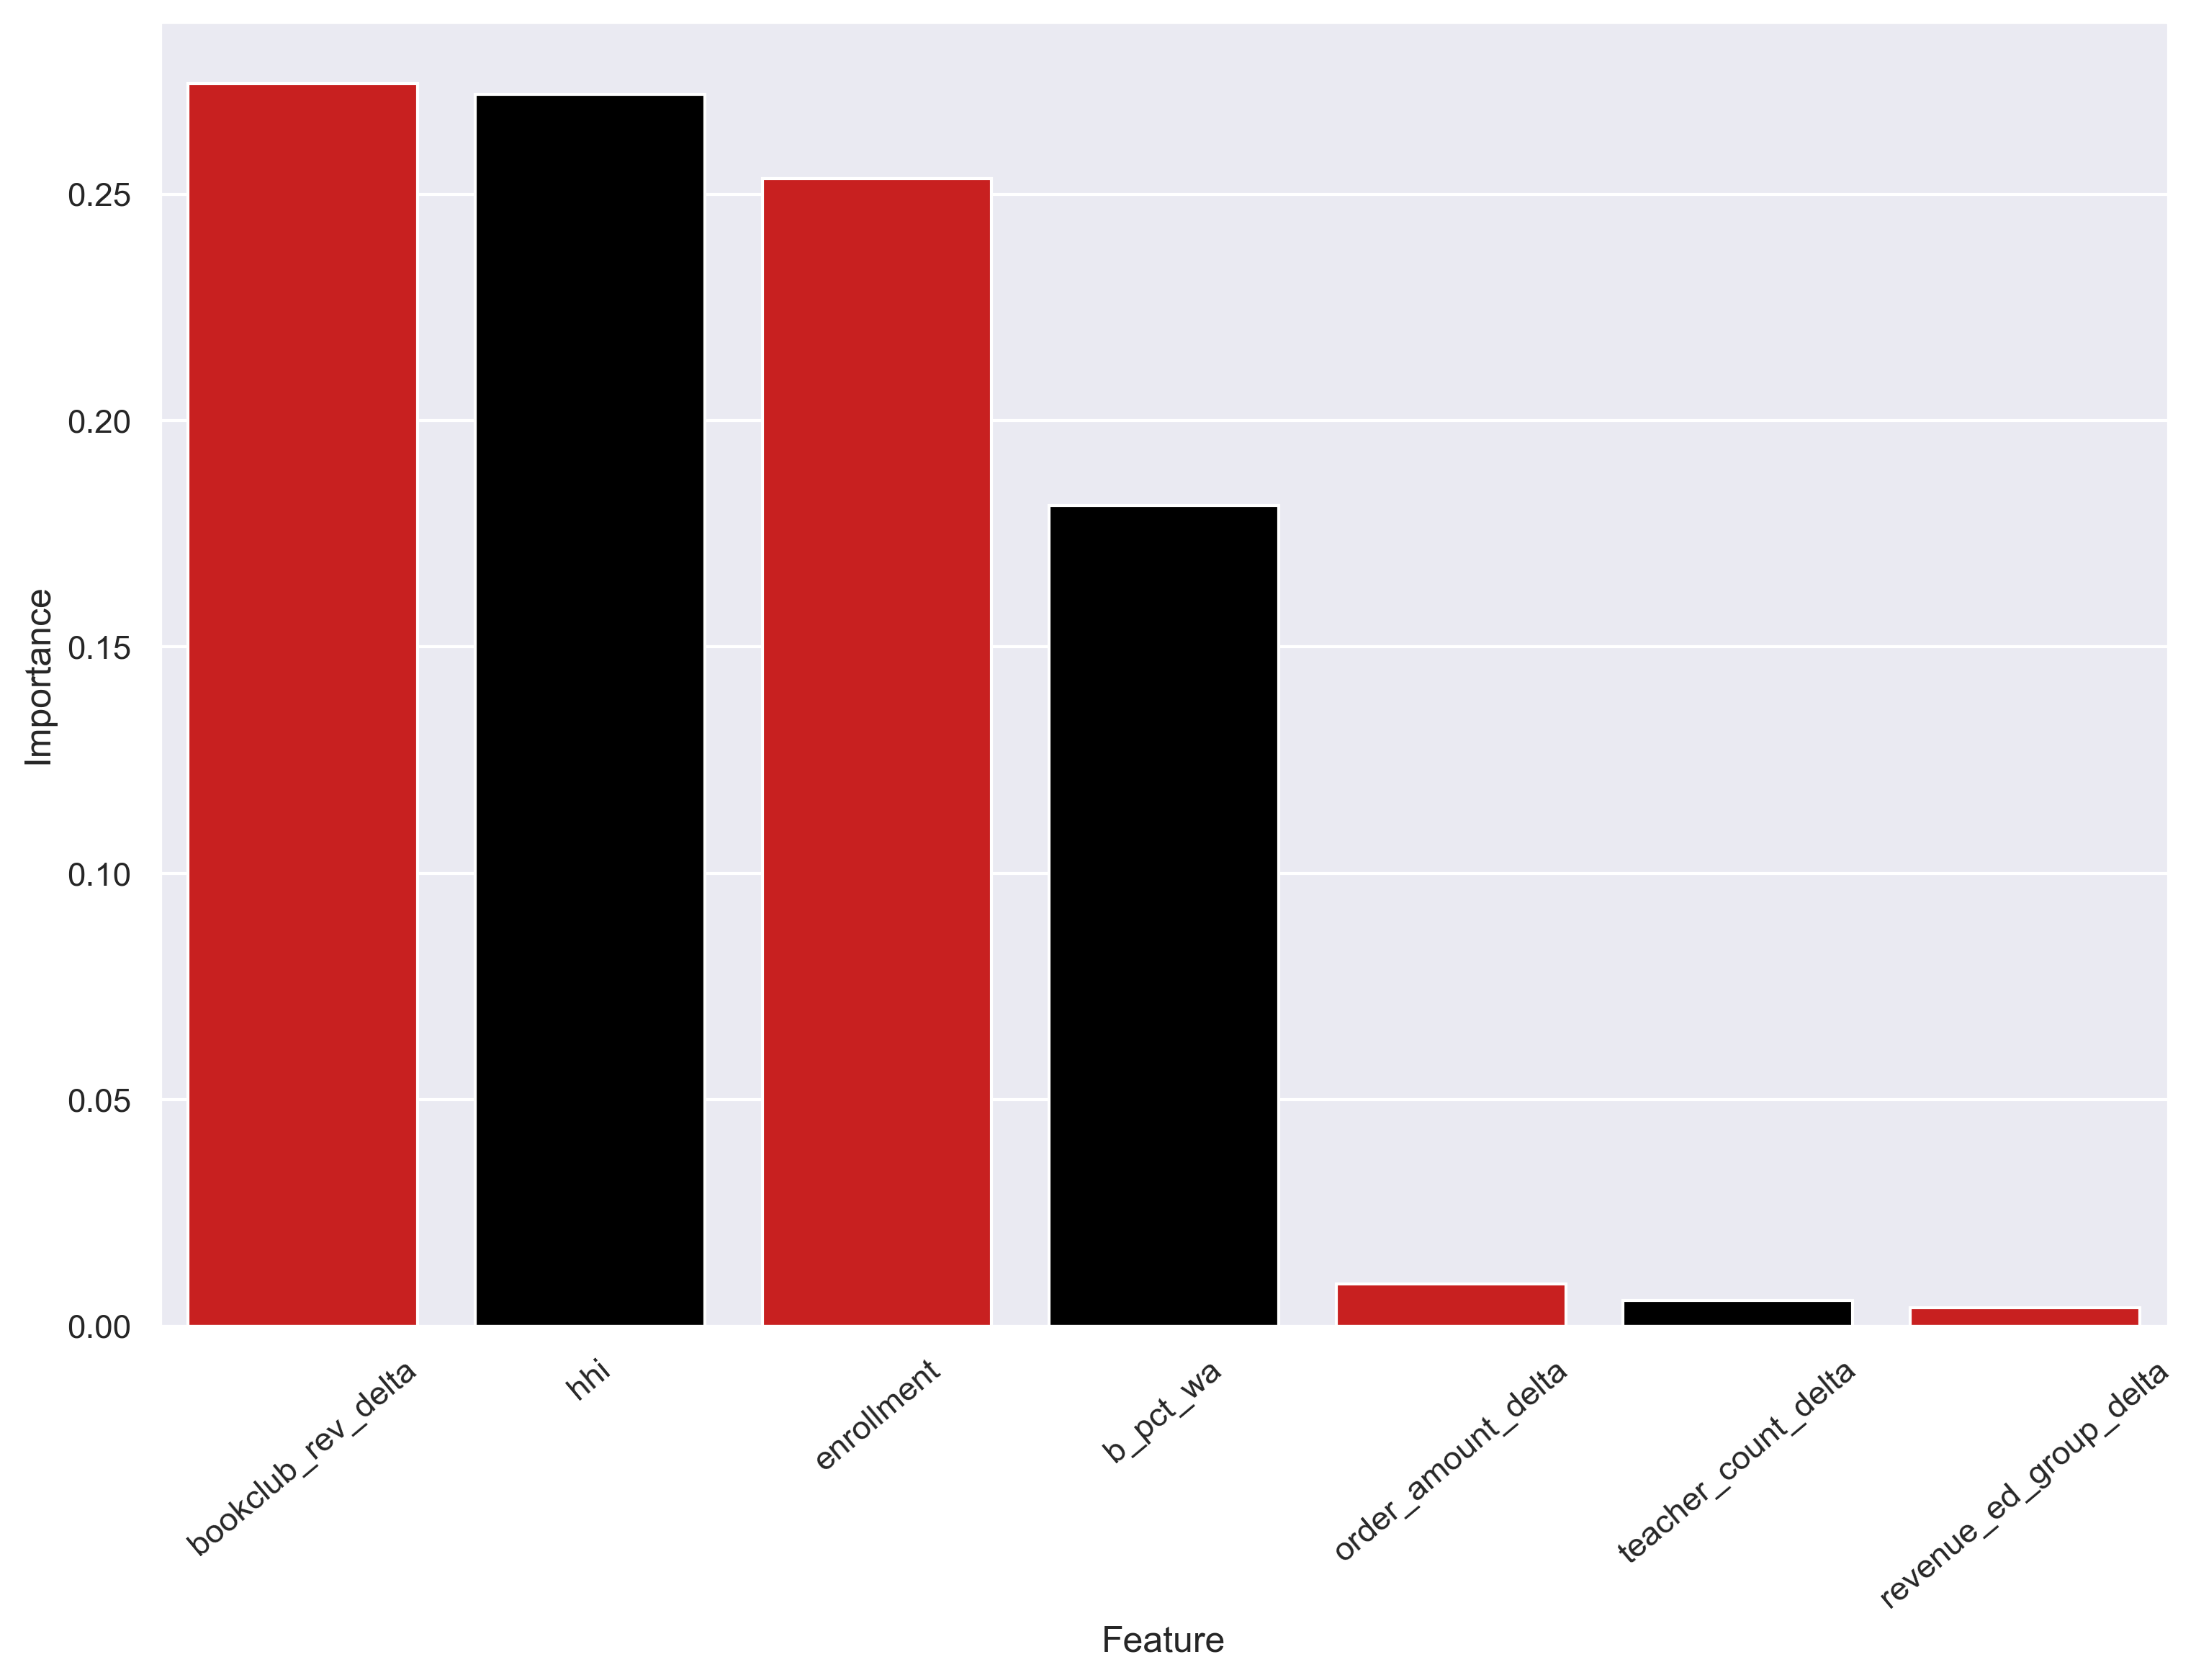

In [135]:
plt.xticks(rotation=40)
features = sns.barplot(data=feat_imp, x='Feature',
					   y='Importance', palette=['#e40404', 'black'])